# Iterator pattern

Implementation of the [iterator pattern](https://en.wikipedia.org/wiki/Iterator_pattern) with a generator.

Traverses a container and accesses the container's elements.


# Environment

Create a Jupyter notebook.

Install and import the **graphviz** library.


## Code description

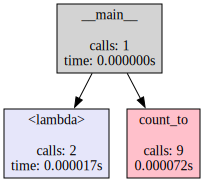

In [90]:
from graphviz import Digraph
import graphviz

dotString = r'''
digraph G {
    graph [size="8,8"];
    main [shape=box, style=filled, fillcolor = lightgray, label = "__main__\n\ncalls: 1\ntime: 0.000000s"]
    lambda [shape=box, style=filled, fillcolor = lavender, label="<lambda>\n\ncalls: 2\ntime: 0.000017s"]
    countto [shape=box, style=filled, fillcolor = pink, label="count_to\n\ncalls: 9\n0.000072s"]
    main -> lambda;
    main -> countto;
}'''

graphviz.Source(dotString, engine='dot')

## count_to function

The **count_to** function uses the `yield from` statement to return one string at a time from the **numbers** list.

The **count** parameter is used to create a slice of the list. For example, `count_to(2)` returns items from `["one", "two"]`.

In [91]:
def count_to(count: int):
    """Counts by word numbers, up to a maximum of five"""
    numbers = ["one", "two", "three", "four", "five"]
    yield from numbers[:count]

## Tests

We create two tests:

+ count_to_two()
+ count_to_five()


In [92]:
def count_to_two():
    for number in count_to(2):
        print(number)
    expect = """
        one
        two
        """
    
def count_to_five():
    for number in count_to(5):
        print(number)
    expect = """
        one
        two
        three
        four
        five
        """

## Run the tests

In [93]:
count_to_two()
print()
count_to_five()


one
two

one
two
three
four
five


## Classic iterator implementation

Rather than calling the `yield from` statement, let's implement the patter from scratch as described in the [Designs Pattern](https://www.pearson.com/en-us/subject-catalog/p/design-patterns-elements-of-reusable-object-oriented-software/P200000009480/9780321700698) book.



In [94]:
import string
letters = list(string.ascii_lowercase)
print(letters)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [95]:
class Iterator:
    def __init__(self, alist) -> None:
        self.current = 0
        self.alist = alist

    def First(self):
        self.current = 0

    def Next(self):
        self.current += 1

    def IsDone(self):
        return self.current == len(self.alist)

    def CurrentItem(self):
        return self.alist[self.current]



iter = Iterator(letters)
iter.First()
while not iter.IsDone():
    print(iter.CurrentItem(), end = ' ')
    iter.Next()




a b c d e f g h i j k l m n o p q r s t u v w x y z 

## Reverse iterator

In [98]:
class ReverseIterator:
    def __init__(self, alist) -> None:
        self.current = 0
        self.alist = alist

    def First(self):
        self.current = len(self.alist) - 1

    def Next(self):
        self.current -= 1

    def IsDone(self):
        return self.current == -1

    def CurrentItem(self):
        return self.alist[self.current]

iter = ReverseIterator(letters)
iter.First()
while not iter.IsDone():
    print(iter.CurrentItem(), end = ' ')
    iter.Next()

z y x w v u t s r q p o n m l k j i h g f e d c b a 

## Filtered iterator

Send a filtering method.



In [109]:
class FilteredIterator:
    def __init__(self, alist, filter) -> None:
        self.current = 0
        self.alist = alist
        self.filter = filter
        self.alist = [x for x in alist if self.filter(x)]

    def First(self):
        self.current = 0

    def Next(self):
        self.current += 1

    def IsDone(self):
        return self.current == len(self.alist)

    def CurrentItem(self):
        return self.alist[self.current]


def BeforeE(x):
    return ord(x) < ord('e')

iter = FilteredIterator(letters, BeforeE)
iter.First()
while not iter.IsDone():
    print(iter.CurrentItem(), end = ' ')
    iter.Next()

a b c d 